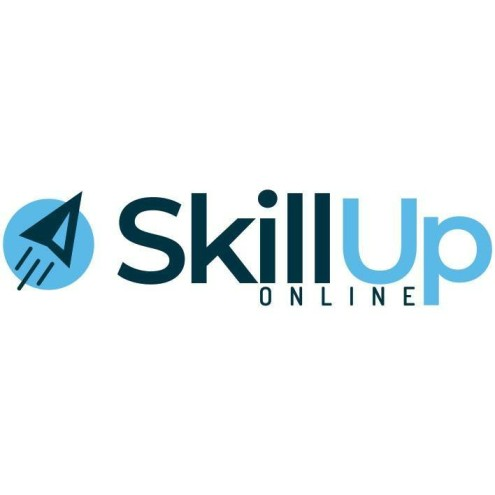

# **Detección de fraudes con tarjetas de crédito**

Enlace al dataset: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

### Importa las bibliotecas necesarias

In [1]:
# Importa la bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")


### Importa y organiza el dataset

In [2]:
# Organizar los datos en un dataframe:

# Cargar el DataSet
data = pd.read_csv('creditcard.csv') #Variar ('creditcard.csv') a la dirección en la que se encuentre el DataSet de ser necesario

# Mostrar las primeras 10 filas del dataset
data.head(10)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0



<details><summary><b>Haz clic aquí para obtener una pista</b></summary>



```
Comienza por importar la biblioteca de pandas: import pandas as pd.
    
Utiliza la función read_csv() para cargar el archivo CSV en un dataframe de pandas. Especifica la ruta en los paréntesis, por ejemplo: pd.read_csv("ruta_al_archivo.csv").
    
Asigna al dataframe resultante al nombre de una variable, por ejemplo: data = pd.read_csv("ruta_al_archivo.csv").
    
Utiliza el método head() sobre el dataframe para mostrar las primeras 10 filas, por ejemplo: data.head(10).
    
Asegúrate de reemplazar "ruta_al_archivo.csv" con la ruta real a tu archivo y el nombre de tu archivo CSV..

```



</details>

### Limpia los datos

a. Valores perdidos

In [3]:
# Contar los valores nulos en cada columna antes de cualquier cambio
print("Conteo de valores nulos por columna antes de modificar los datos:")
print(data.isnull().sum())

# Eliminar las columnas completamente nulas, si las hay
columnas_eliminadas = data.isnull().all().any()
if columnas_eliminadas:
    data = data.dropna(axis=1, how='all')
    print("Se eliminaron las columnas completamente nulas.")
    
# Eliminar las filas con al menos un valor nulo, si las hay
filas_eliminadas = data.isnull().any().any()
if filas_eliminadas:
    data = data.dropna(axis=0, how='any')
    print("Se eliminaron las filas con valores nulos.")

# Mostrar el conteo de valores nulos después de las eliminaciones (si se hicieron)
if columnas_eliminadas or filas_eliminadas:
    print("\nConteo de valores nulos por columna después de las eliminaciones:")
    print(data.isnull().sum())
else:
    print("No se eliminaron ni filas ni columnas.")
    

Conteo de valores nulos por columna antes de modificar los datos:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64
No se eliminaron ni filas ni columnas.


<details><summary><b>Haz clic aquí para obtener una pista</b></summary>



```

Utiliza el nombre de la variable del dataframe seguido del método isnull() para crear un dataframe booleano donde «verdadero» indique un valor nulo y «falso» indique un valor no nulo.

Utiliza el método sum() en el dataframe booleano para contar la cantidad de valores verdaderos (i.e., la cantidad de valores nulos) en cada columna.

Si unes ambos pasos, el código se verá así: data.isnull().sum()


Este código asume que el nombre del datafrme de pandas es «data». Si tu dataframe tiene un nombre diferente, reemplaza «data» con el nombre correcto de la variable.

```



</details>

b. Datos duplicados

In [4]:
# Contar la cantidad de filas duplicadas antes de eliminar
duplicados_count = data.duplicated().sum()
print(f"Cantidad de filas duplicadas antes de eliminar: {duplicados_count}")

# Eliminar las filas duplicadas
if duplicados_count > 0:
    data = data.drop_duplicates()
    print("Las filas duplicadas han sido eliminadas.")
else:
    print("No se han encontrado filas duplicadas. No se ha eliminado ninguna.")


Cantidad de filas duplicadas antes de eliminar: 1081
Las filas duplicadas han sido eliminadas.


<details><summary><b>Haz clic aquí para obtener una pista</b></summary>



```
Usa el nombre de la variable del dataframe seguido del método duplicated() para crear un dataframe booleano donde «verdadero» indicará una fila duplicada y «falso» una fila no duplicada.

Usa el método sum() en el dataframe booleano para contar la cantidad de valores verdaderos (i.e., la cantidad de filas duplicadas).

Si unes ambos pasos, el código se verá así: data.duplicated().sum()

Este código asume que el nombre del dataframe de pandas es «data». Si tu dataframe tiene un nombre diferente, reemplaza «data» con el nombre correcto de la variable.

```



</details>

### Analiza los datos

Pregunta 1: ¿Cuál es el porcentaje de transacciones fraudulentas en el dataset?



In [5]:
# Contar el número de transacciones fraudulentas (Class == 1)
transacciones_fraudulentas = data[data['Class'] == 1].shape[0]

# Contar el número total de transacciones
total_transacciones = data.shape[0]

# Calcular el porcentaje de transacciones fraudulentas
porcentaje_fraude = (transacciones_fraudulentas / total_transacciones) * 100

# Imprimir el resultado
print(f"Porcentaje de transacciones fraudulentas: {porcentaje_fraude:.4f}%")


Porcentaje de transacciones fraudulentas: 0.1667%


<details>
  <summary><b>Haz clic aquí para obtener una pista</b></summary>

    Para calcular el porcentaje de transacciones fraudulentas, debes contar la cantidad de transacciones fraudulentas (aquellas donde «Class» es igual a 1) y dividirla por le número total de transacciones en el dataset. Después, multiplica el resultado por 100 para obtener el porcentaje.
</details>

Pregunta 2: ¿Cuál es el importe medio de las transacciones fraudulentas?



In [6]:
# Filtrar las transacciones fraudulentas (Class == 1)
transacciones_fraudulentas = data[data['Class'] == 1]

# Calcula el importe medio de las transacciones fraudulentas
importe_medio_fraude = transacciones_fraudulentas['Amount'].mean()

# Muestra el importe medio de las transacciones fraudulentas
print(f"Importe medio de las transacciones fraudulentas: {importe_medio_fraude:.2f}")


Importe medio de las transacciones fraudulentas: 123.87


<details>
  <summary><b>Haz clic aquí para obtener una pista</b></summary>

    Para calcular el importe medio de las tansacciones fraudulentas, primero deberás filtrar el dataset para que contenga solamente las transacciones fraudulentas (aquellas donde «Class» es igual a 1) y, después, calcular la media de la columna «Amount» de los datos filtrados.
</details>

### Visualiza los datos


Pregunta 1: ¿Cuántas transacciones fraudulentas hay en comparación con las no fraudulentas? (Utiliza un gráfico de barras)

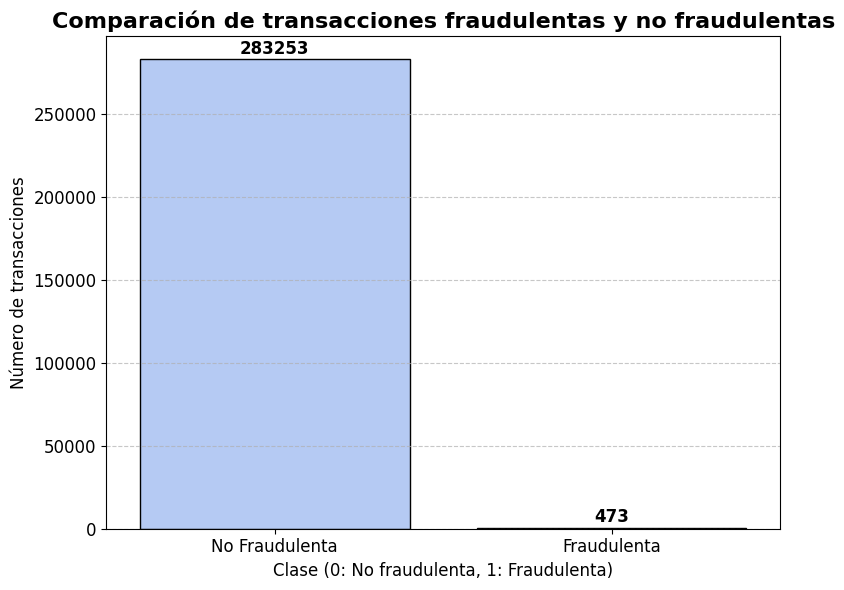

In [7]:
# Cuenta el número de transacciones fraudulentas y no fraudulentas
conteo_clases = data['Class'].value_counts()

# Crear un gráfico de barras con un estilo más atractivo
plt.figure(figsize=(8,6))
sns.barplot(x=conteo_clases.index, y=conteo_clases.values, palette='coolwarm', edgecolor='black')

# Añadir los valores de las barras encima de cada barra
for index, value in enumerate(conteo_clases.values):
    plt.text(index, value + 1000, f'{value}', ha='center', va='bottom', fontsize=12, color='black', fontweight='bold')

# Configuración del gráfico
plt.title('Comparación de transacciones fraudulentas y no fraudulentas', fontsize=16, fontweight='bold')
plt.xlabel('Clase (0: No fraudulenta, 1: Fraudulenta)', fontsize=12)
plt.ylabel('Número de transacciones', fontsize=12)
plt.xticks([0, 1], ['No Fraudulenta', 'Fraudulenta'], rotation=0, fontsize=12)
plt.yticks(fontsize=12)

# Mejorar la presentación general
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Muestra la distribución de las traducciones fraudulentas con respecto de las no fraudulentas
plt.show()


<details>
  <summary><b>Haz clic aquí para obtener una pista</b></summary>

    Para crear un gráfico de barras que muestre la cantidad de transacciones fraudulentas y no fraudulentas, deberás contar las veces que ocurre cada clase (fraude y no fraude) según la información de la columna «Class» y después representar estos recuentos en un gráfico de barras.
</details>

Pregunta 2: ¿Cuál es la distribución de los importes de las transacciones fraudulentas? (Utiliza un histograma)


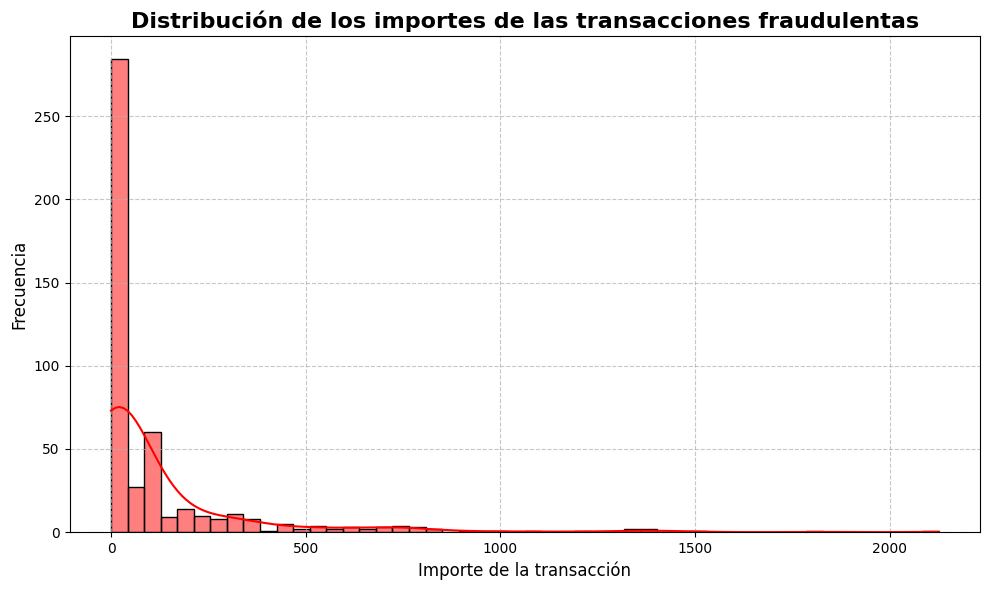

In [8]:
# Separa los datos de transacciones fraudulentas
transacciones_fraudulentas = data[data['Class'] == 1]

# Crear un histograma para visualizar la distribución de los importes
plt.figure(figsize=(10,6))
sns.histplot(transacciones_fraudulentas['Amount'], bins=50, kde=True, color='red')

# Configuración del gráfico
plt.title('Distribución de los importes de las transacciones fraudulentas', fontsize=16, fontweight='bold')
plt.xlabel('Importe de la transacción', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Muestra la distribución de los importes de las transacciones fraudulentas
plt.tight_layout()
plt.show()


<details>
  <summary><b>Haz clic aquí para obtener una pista</b></summary>
    
    Para visualizar la distribución de los importes de las transacciones fraudulentas, deberás filtrar el dataset para que contenga únicamente las transacciones fraudulentas (aquellas donde «Class» es igual a 1) y, después, usar un histograma para representar la distribución de los valores de la columna «Amount» de los datos filtrados.
</details>

## Desarrollo y evaluación de modelos

### Separa del dataset

In [9]:
# Importar la función train_test_split de scikit-learn
from sklearn.model_selection import train_test_split

# Crear X con todas las columnas excepto la columna 'Class'
X = data.drop('Class', axis=1)

# Crear y solo con la columna 'Class'
y = data['Class']

# Separa los datos de entrenamiento y evaluación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificar las dimensiones de los conjuntos de entrenamiento y evaluación
print("Tamaño del conjunto de entrenamiento X:", X_train.shape)
print("Tamaño del conjunto de evaluación X:", X_test.shape)
print("Tamaño del conjunto de entrenamiento y:", y_train.shape)
print("Tamaño del conjunto de evaluación y:", y_test.shape)


Tamaño del conjunto de entrenamiento X: (226980, 30)
Tamaño del conjunto de evaluación X: (56746, 30)
Tamaño del conjunto de entrenamiento y: (226980,)
Tamaño del conjunto de evaluación y: (56746,)


<details><summary><b>Haz clic aquí para obtener una pista</b></summary>



```
Una vez que tegas este dataset, puedes utilizar la biblioteca scikit-learn para separar los datos en grupos de entrenamiento y de evaluación con la función train_test_split().

Primero, puedes crear un dataframe de pandas «X» con todas las columnas excepto la columna «Class». Puedes crear una serie de pandas «y» solamente con la clumna «Class» column.

A continuación, pueder usar la función train_test_split() para separar los datos en grupos de entrenamiento y de evaluación. Puedes pasar las variables X e Y como argumentos junto con el argumento test_size para especificar el porcentaje del dataset que se deberá asignar al grupo de evaluación (en este caso, el 20 %). También puedes utilizar el argumento random_state para determinar un valor fijo de tal manera que, cada vez que se ejecute el código, se produzca la misma división.

La función train_test_split() devuelve cuatro variables: X_train, X_test, y_train y y_test. X_train e y_train representan el grupo de entrenamiento, minetras que X_test e y_test representan el grupo de evaluación. Puedes utilizar estas variable para entrenar y evaluar tus modelos de aprendizaje automático.

Ten en cuenta que es importante dividir los datos en grupos de entrenamiento y de evaluación para evitar el sobreajuste y permitir que se evalúe el rendimiento del modelo con datos que desconoce.

```



</details>

### Crea y evalúa los modelos

In [10]:
# Importar las bibliotecas necesarias
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Crear una instancia del clasificador RandomForest con los hiperparámetros especificados
rf_model = RandomForestClassifier(max_depth=150, random_state=42)

# Entrenar el modelo con los datos de entrenamiento
rf_model.fit(X_train, y_train)

# Hacer predicciones sobre el conjunto de evaluación
y_pred = rf_model.predict(X_test)

# Generar el informe de clasificación
print("Informe de clasificación:\n", classification_report(y_test, y_pred))

# Calcular la exactitud del modelo
accuracy = accuracy_score(y_test, y_pred)

# Mostrar la exactitud en porcentaje
print(f"Exactitud del modelo: {accuracy * 100:.2f}%")


Informe de clasificación:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.97      0.73      0.84        90

    accuracy                           1.00     56746
   macro avg       0.99      0.87      0.92     56746
weighted avg       1.00      1.00      1.00     56746

Exactitud del modelo: 99.95%


<details><summary><b>Haz clic aquí para obtener una pista</b></summary>



```
Debes haber importado las bibliotecas y clases necesarias, tales como la clase RandomForestClassifier de scikit-learn y las funciones classification_report() y accuracy_score() functions del módulo sklearn.metrics.

Una vez hayas hecho esto, podrás crear una instancia de la clase RandomForestClassifier configurando los hiperparámetros max_depth y random_state en 150 y 42, respectivamente. Puedes utilizar el método .fit() para entrenar el modelo con los datos de entrenamiento.

A continuación, puedes utilizar el modelo entrenado para hacer predicciones sobre los datos de evaluación con el método .predict(). Puedes almacenar estas predicciones en una variable llamada y_pred.

Después, puedes utilizar la función classification_report() para mostrar en la pantalla un resumen del rendimiento del modelo con los datos de entrenamiento. Esto incluirá métricos tales como la precisión (precission), la exhaustividad (recall) y la puntuación F1 (f1-score) para cada una de las clases (en este caso, si una transacción es fraudulenta o normal). También puedes utilizar la función accuracy_score() para calcular la exactitud general del modelo con los datos de evaluación.

Finalmente, podrás mostrar la exactitud el modelo en forma de porcentaje; utiliza el operador *100 para multiplicar la puntuación de exactitud por 100.

```



</details>